# Capstone Project: Telecom Churn

In [45]:
import pandas as pd

In [46]:
import numpy as np

In [47]:
import matplotlib.pyplot as plt

In [48]:
import seaborn as sns

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [53]:
from sklearn.impute import SimpleImputer

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load the dataset
telecom_churn_data = pd.read_csv('telecom_churn_data.csv')

telecom_churn_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


# Data Exploration

## Preprocessing of Customer Data and Filtering High-Value Customers

In [5]:
telecom_churn_data.shape

(99999, 226)

In [6]:
telecom_churn_data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [7]:
telecom_churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


### Data Cleaning

In [8]:
print(telecom_churn_data.dtypes)

# Convert date columns to datetime format (if applicable)
date_columns = ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 
                'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']
for col in date_columns:
    telecom_churn_data[col] = pd.to_datetime(telecom_churn_data[col], errors='coerce')

mobile_number       int64
circle_id           int64
loc_og_t2o_mou    float64
std_og_t2o_mou    float64
loc_ic_t2o_mou    float64
                   ...   
aon                 int64
aug_vbc_3g        float64
jul_vbc_3g        float64
jun_vbc_3g        float64
sep_vbc_3g        float64
Length: 226, dtype: object


In [9]:
# Fill missing values
numerical_cols = telecom_churn_data.select_dtypes(include=[np.number]).columns
telecom_churn_data[numerical_cols] = telecom_churn_data[numerical_cols].fillna(telecom_churn_data[numerical_cols].median())

categorical_cols = telecom_churn_data.select_dtypes(include=[object]).columns
for col in categorical_cols:
    telecom_churn_data[col].fillna(telecom_churn_data[col].mode()[0], inplace=True)

In [12]:
# Calculate average recharge for June and July
telecom_churn_data['avg_rech_amt_6_7'] = (telecom_churn_data['total_rech_amt_6'] + telecom_churn_data['total_rech_amt_7']) / 2

In [13]:
# Define high-value customers (top 30% based on recharge)
percentile_70 = telecom_churn_data['avg_rech_amt_6_7'].quantile(0.7)
high_value_customers = telecom_churn_data[telecom_churn_data['avg_rech_amt_6_7'] >= percentile_70]

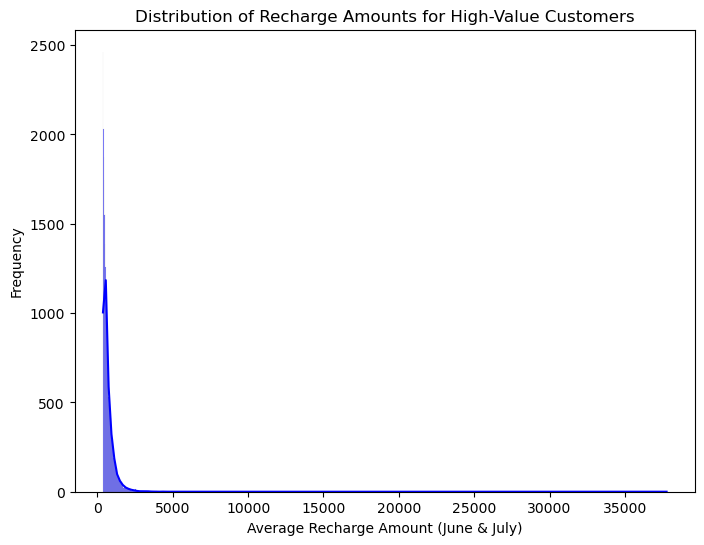

Number of high-value customers: 30011


In [14]:
# Plot distribution of recharge amounts to visualize high-value customers
plt.figure(figsize=(8,6))
sns.histplot(high_value_customers['avg_rech_amt_6_7'], kde=True, color='blue')
plt.title('Distribution of Recharge Amounts for High-Value Customers')
plt.xlabel('Average Recharge Amount (June & July)')
plt.ylabel('Frequency')
plt.show()

print("Number of high-value customers:", high_value_customers.shape[0])

# Feature Engineering, Data Cleaning, and Handling Class Imbalance

In [34]:
# Handling missing data: drop columns with more than 30% missing values and fill the remaining with median
missing_percentage = high_value_customers.isnull().sum() * 100 / len(high_value_customers)
columns_to_drop = missing_percentage[missing_percentage > 30].index
high_value_customers_cleaned = high_value_customers.drop(columns=columns_to_drop)

In [36]:
# Fill remaining missing values with the median
# Check for non-numeric columns
non_numeric_columns = high_value_customers_cleaned.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns:", non_numeric_columns)

# Drop or convert non-numeric columns (if needed, you can convert date strings to datetime)
# In this case, you can choose to drop the non-numeric columns for the purpose of modeling.
high_value_customers_cleaned = high_value_customers_cleaned.drop(columns=non_numeric_columns)

# Now, fill remaining missing values in numeric columns with the median
high_value_customers_cleaned = high_value_customers_cleaned.fillna(high_value_customers_cleaned.median())

# Checking for remaining missing values
print("Remaining missing values:", high_value_customers_cleaned.isnull().sum().sum())


Non-numeric columns: Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'],
      dtype='object')
Remaining missing values: 0


In [40]:
print(high_value_customers_cleaned.columns)

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6',
       'onnet_mou_7',
       ...
       'fb_user_6', 'fb_user_7', 'fb_user_8', 'aon', 'aug_vbc_3g',
       'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g', 'avg_rech_amt_6_7',
       'avg_rech_amt'],
      dtype='object', length=165)


In [41]:
# Tag churners: those with no incoming or outgoing calls and no data usage in month 9
high_value_customers_cleaned['churn'] = ((high_value_customers_cleaned['loc_og_t2o_mou'] == 0) &
                                         (high_value_customers_cleaned['std_og_t2o_mou'] == 0) &
                                         (high_value_customers_cleaned['loc_ic_t2o_mou'] == 0) &
                                         (high_value_customers_cleaned['onnet_mou_6'] == 0)).astype(int)

In [42]:
# Drop churn phase columns (related to the 9th month)
churn_phase_cols = [col for col in high_value_customers_cleaned.columns if '_9' in col]
high_value_customers_cleaned = high_value_customers_cleaned.drop(columns=churn_phase_cols)


In [ ]:
pip install scikit-learn==1.1.3

In [ ]:
pip install imbalanced-learn==0.9.0

In [ ]:
conda install scikit-learn=1.1.3

In [ ]:
conda install -c conda-forge imbalanced-learn=0.9.0

In [ ]:
import sklearn

In [ ]:
import imblearn

In [ ]:
# Handling class imbalance using SMOTE (oversampling)
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [ ]:
# Features and target variable
X = high_value_customers_cleaned.drop(columns=['churn'])
y = high_value_customers_cleaned['churn']

In [ ]:
# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [ ]:

# Plot class distribution before and after SMOTE
plt.figure(figsize=(8,6))
sns.countplot(x=y_train, palette="Set2")
plt.title('Class Distribution Before SMOTE')
plt.show()

plt.figure(figsize=(8,6))
sns.countplot(x=y_train_res, palette="Set2")
plt.title('Class Distribution After SMOTE')
plt.show()

## Model Training Using Logistic Regression and Random Forest

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Logistic Regression Model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_res, y_train_res)

In [ ]:
# Random Forest Model
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_res, y_train_res)

## Evaluating Model Performance and Identifying Key Churn Indicators

In [31]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Logistic Regression predictions
y_pred_logreg = logreg.predict(X_test)

# Random Forest predictions
y_pred_rfc = rfc.predict(X_test)

In [ ]:
# Evaluating Logistic Regression
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Classification Report for Logistic Regression:\n", classification_report(y_test, y_pred_logreg))
print("Confusion Matrix for Logistic Regression:\n", confusion_matrix(y_test, y_pred_logreg))

# Evaluating Random Forest
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rfc))
print("Classification Report for Random Forest:\n", classification_report(y_test, y_pred_rfc))
print("Confusion Matrix for Random Forest:\n", confusion_matrix(y_test, y_pred_rfc))

In [ ]:
# Feature Importance for Random Forest
feature_importances = pd.Series(rfc.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

In [ ]:
# Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances[:10], y=feature_importances.index[:10], palette="Set1")
plt.title('Top 10 Important Features (Random Forest)')
plt.show()

In [ ]:
# Logistic Regression coefficients
log_coeff = pd.Series(logreg.coef_[0], index=X_train.columns)
log_coeff = log_coeff.sort_values()

In [ ]:
# Plot logistic regression coefficients
plt.figure(figsize=(10,6))
log_coeff[:10].plot(kind='barh', color='skyblue')
plt.title('Top 10 Important Features (Logistic Regression Coefficients)')
plt.show()